# Hello Neural Networks.

## Important supporting libraries

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

2023-04-13 17:50:20.340736: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 17:50:20.540741: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-13 17:50:20.540793: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-13 17:50:20.584398: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-13 17:50:22.655748: W tensorflow/stream_executor/platform/de

## Prepare a simple Neural Network

In [3]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

2023-04-13 17:50:33.317126: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-13 17:50:33.317204: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-13 17:50:33.317244: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-cd8f0e9c-9c86-4a16-b6b8-ffaeaa357a58): /proc/driver/nvidia/version does not exist
2023-04-13 17:50:33.318257: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Prepare a simple dataset

In [4]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 0.0, 2.0, 4.0, 6.0, 8.0], dtype=float)
print(xs)
print(ys)


[-1.  0.  1.  2.  3.  4.]
[-2.  0.  2.  4.  6.  8.]


ys = 2* xs

## Visualize the dataset

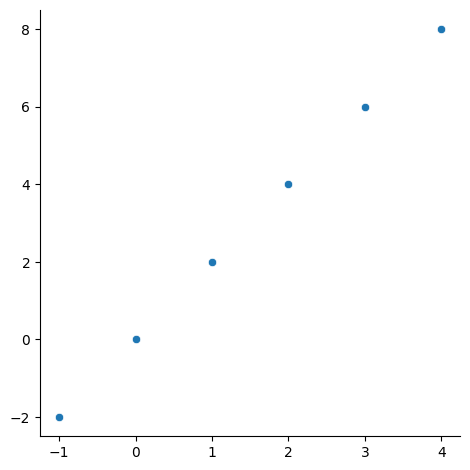

In [5]:
sns.relplot(x = xs,  y = ys)

## Train the Neural Network

In [5]:
model.fit(xs, ys, epochs=1)

Epoch 1/50
1/1 [==============================] - 0s 250ms/step - loss: 63.6840
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 50.2190
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 39.6231
Epoch 4/50
1/1 [==============================] - 0s 3ms/step - loss: 31.2844
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 24.7216
Epoch 6/50
1/1 [==============================] - 0s 2ms/step - loss: 19.5561
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 15.4899
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 12.2887
Epoch 9/50
1/1 [==============================] - 0s 17ms/step - loss: 9.7681
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 7.7829
Epoch 11/50
1/1 [==============================] - 0s 2ms/step - loss: 6.2191
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 4.9868
Epoch 13/50
1/1 [==============================] - 0s 2ms/step

## Try a test dataset

In [6]:
t = np.array([5.0, 6.0, 7.0])
print(model.predict(t))

1/1 [==============================] - 0s 61ms/step
[[ 9.58381  ]
 [11.3789835]
 [13.174158 ]]


## Try with the training dataset

In [7]:
y_hat = model.predict(xs)[:,0]
print(xs)
print(ys)
print(y_hat)

1/1 [==============================] - 0s 15ms/step
[-1.  0.  1.  2.  3.  4.]
[-2.  0.  2.  4.  6.  8.]
[-1.1872342  0.6079398  2.4031138  4.198288   5.9934616  7.7886357]


## Visualize the result

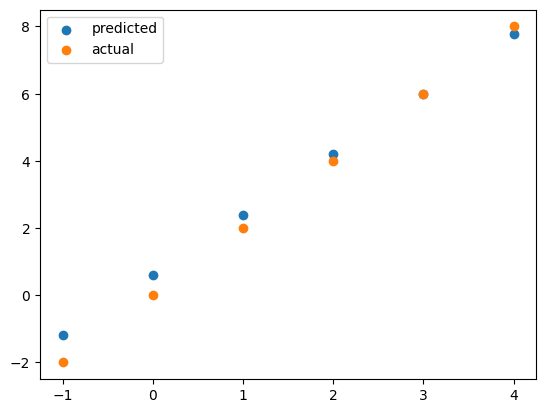

In [8]:
plt.scatter(xs, y_hat, label = 'predicted')
plt.scatter(xs, ys, label = 'actual')
plt.legend()

## It might not be clear how the NN is trained. Let's show it step by step.

In [9]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

1/1 [==============================] - 0s 36ms/step


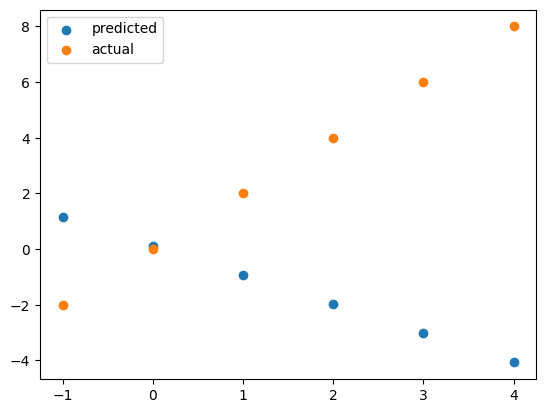

In [10]:
model.fit(xs, ys, epochs=1)
y_hat = model.predict(xs)[:,0]
plt.scatter(xs, y_hat, label = 'predicted')
plt.scatter(xs, ys, label = 'actual')
plt.legend()

# Compare NN with Linear Regression

## Round 1: Linear relationship with few data points

### Train a Linear Regression model

In [11]:
xs = xs.reshape(-1,1)
t = t.reshape(-1, 1)
reg = LinearRegression().fit(xs, ys)
print(reg.predict(t))

[10. 12. 14.]


### Conclusion: Linear Regression Won!
We learned Neural Network is not as good as Linear Regression simply beacause we have so few data. Let's create a larger data set then.

## Round 2: Linear relationship with many data points

In [12]:
x_large = np.random.uniform(-10, 10, (10000))
x_large.sort()
y_large = x_large*2
print(x_large)
print(y_large)

[-9.99885156 -9.99196827 -9.98839674 ...  9.98231861  9.99611098
  9.99823514]
[-19.99770313 -19.98393653 -19.97679347 ...  19.96463721  19.99222197
  19.99647028]


### Let's visualize the new dataset

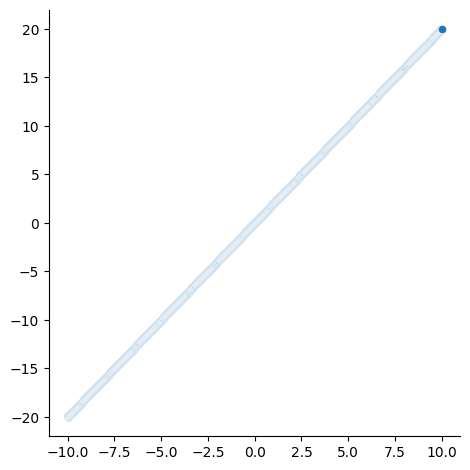

In [13]:
sns.relplot(x = x_large, y = y_large)

### Let's train the neural network again

In [14]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(x_large, y_large, epochs=50)

Epoch 1/50
313/313 [==============================] - 0s 929us/step - loss: 0.2925
Epoch 2/50
313/313 [==============================] - 0s 917us/step - loss: 4.1208e-11
Epoch 3/50
313/313 [==============================] - 0s 900us/step - loss: 3.2328e-15
Epoch 4/50
313/313 [==============================] - 0s 900us/step - loss: 2.9490e-16
Epoch 5/50
313/313 [==============================] - 0s 808us/step - loss: 1.1694e-16
Epoch 6/50
313/313 [==============================] - 0s 878us/step - loss: 2.1803e-17
Epoch 7/50
313/313 [==============================] - 0s 936us/step - loss: 1.7773e-17
Epoch 8/50
313/313 [==============================] - 0s 891us/step - loss: 1.5041e-17
Epoch 9/50
313/313 [==============================] - 0s 931us/step - loss: 9.5303e-18
Epoch 10/50
313/313 [==============================] - 0s 787us/step - loss: 2.9244e-18
Epoch 11/50
313/313 [==============================] - 0s 909us/step - loss: 2.6396e-18
Epoch 12/50
313/313 [========================

### Let's observe the result

In [15]:
t = np.array([5.0, 6.0, 7.0])
print(model.predict(t))

1/1 [==============================] - 0s 57ms/step
[[10.]
 [12.]
 [14.]]


### Conclusion: 
With many datapoints, a Neural Network can do as well as a Linear Regression model (for a simple straightline relationship)

## Round 3: Multi-variable Linear relationship.
We tried one variable input, how about two variables?

### Prepare a NN with 2 inputs

In [16]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[2])])
model.compile(optimizer='sgd', loss='mean_squared_error')

### Prepare some 2-dimensional datapoints and train the model

In [17]:
xs = np.array([[-1, -1], [0, 1], [1, 2], [-1, 0]])
ys = np.array([-2, 1, 3, -1])
model.fit(xs, ys, epochs = 50)

#ys = xs1 + xs2

Epoch 1/50
1/1 [==============================] - 0s 169ms/step - loss: 3.2576
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 3.0287
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 2.8169
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 2.6208
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 2.4392
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 2.2709
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 2.1151
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 1.9707
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 1.8368
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 1.7127
Epoch 11/50
1/1 [==============================] - 0s 2ms/step - loss: 1.5976
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 1.4909
Epoch 13/50
1/1 [==============================] - 0s 2ms/step - loss: 

### Test the model

In [18]:
t = np.array([[3, 4], [0, 9], [-2, 2]])
print(model.predict(t))

1/1 [==============================] - 0s 29ms/step
[[ 5.6687555]
 [11.833715 ]
 [ 2.1177921]]


### Prepare a Linear Regression and test

In [19]:
reg = LinearRegression().fit(xs, ys)
print(reg.predict(t))

[ 7.00000000e+00  9.00000000e+00 -1.16573418e-15]


### Conclusion: Still LR won. 
Maybe we need more data

In [20]:
x_large = np.random.uniform(-10, 10, (10000, 2))
print(x_large)
y_large = np.sum(x_large, axis = 1)
print(y_large)

[[ 3.83318192e+00 -9.69160794e+00]
 [-1.60615131e-03 -6.14233634e+00]
 [-2.91511449e+00 -1.25782616e-01]
 ...
 [ 2.52837268e+00 -5.01966462e+00]
 [ 2.64744448e+00  1.82292700e+00]
 [-1.16130409e+00  8.95057456e+00]]
[-5.85842602 -6.14394249 -3.04089711 ... -2.49129194  4.47037148
  7.78927047]


### Train the NN again with more data

In [21]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[2])])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(x_large, y_large, epochs = 50)

Epoch 1/50
313/313 [==============================] - 0s 947us/step - loss: 0.2193
Epoch 2/50
313/313 [==============================] - 0s 894us/step - loss: 1.9676e-11
Epoch 3/50
313/313 [==============================] - 0s 779us/step - loss: 1.3513e-13
Epoch 4/50
313/313 [==============================] - 0s 816us/step - loss: 1.3398e-13
Epoch 5/50
313/313 [==============================] - 0s 898us/step - loss: 1.3539e-13
Epoch 6/50
313/313 [==============================] - 0s 895us/step - loss: 1.3393e-13
Epoch 7/50
313/313 [==============================] - 0s 922us/step - loss: 1.3474e-13
Epoch 8/50
313/313 [==============================] - 0s 800us/step - loss: 1.3396e-13
Epoch 9/50
313/313 [==============================] - 0s 893us/step - loss: 1.3556e-13
Epoch 10/50
313/313 [==============================] - 0s 891us/step - loss: 1.3740e-13
Epoch 11/50
313/313 [==============================] - 0s 957us/step - loss: 1.3395e-13
Epoch 12/50
313/313 [========================

### Let's observe the result

In [22]:
t = np.array([[3, 4], [0, 9], [-2, 2]])
print(model.predict(t))

1/1 [==============================] - 0s 37ms/step
[[7.000000e+00]
 [9.000000e+00]
 [7.636544e-09]]


### Conclusion:
OK.. Again, Neural Network is just as good as Linear Regression

## Round4: Let's learn some non-linear relationship then

### Create a square root relationship

In [23]:
import math
size = 100000
xs = np.random.uniform(0, 10, (size))
xs.sort()
ys = [0] * size
for i in range(size):
  ys[i] = math.sqrt(xs[i])
ys = np.array(ys)

### Visualize the relationship

<AxesSubplot: >

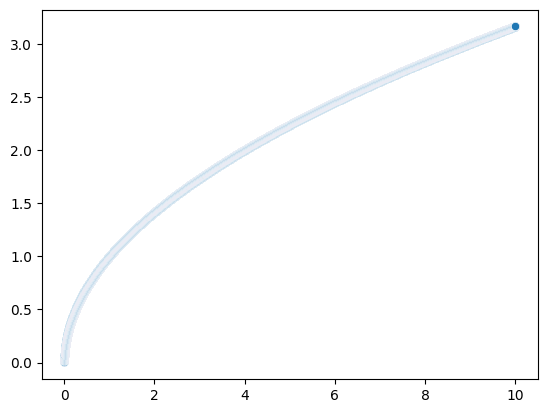

In [24]:
sns.scatterplot(x = xs, y = ys)

### Train a deep neural network

In [25]:
model = keras.Sequential([
      tf.keras.layers.Dense(64, input_shape = [1]),
      tf.keras.layers.Dense(64, activation = 'sigmoid'),
      tf.keras.layers.Dense(64, activation = 'sigmoid'),
      tf.keras.layers.Dense(1)
  ])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(xs, ys, epochs=50)

Epoch 1/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0234
Epoch 2/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0043
Epoch 3/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0041
Epoch 4/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0038
Epoch 5/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0034
Epoch 6/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0029
Epoch 7/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0025
Epoch 8/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0020
Epoch 9/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0016
Epoch 10/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0013
Epoch 11/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0011
Epoch 12/50
3125/3125 [==============================] - 4s 1ms/step - loss: 8.9498e-

### Observe the result and compare it with the training data

313/313 [==============================] - 0s 824us/step


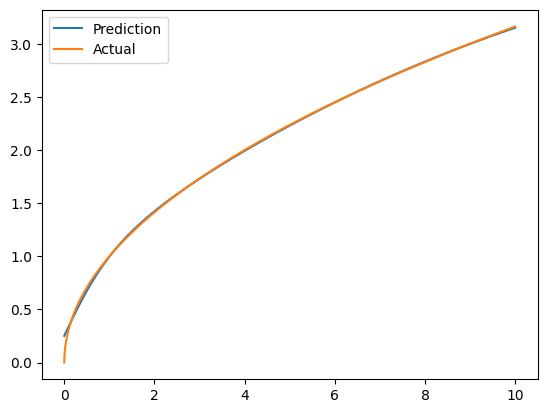

In [26]:
t = np.arange(0, 10,0.001)
plt.plot(t, model.predict(t), label = 'Prediction')
plt.plot(xs, ys, label = 'Actual')
plt.legend()

4/4 [==============================] - 0s 1ms/step


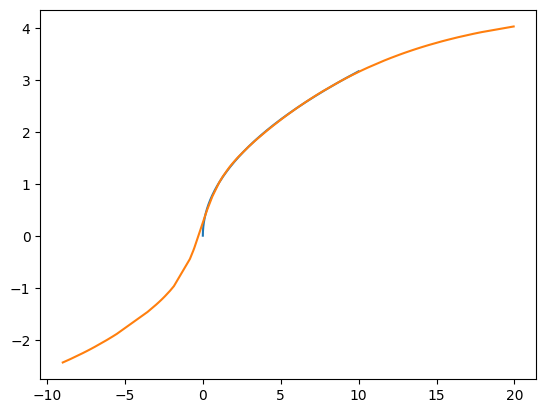

In [27]:
t = np.random.uniform(-10, 20, (100))
t.sort()
plt.plot(xs, ys)
plt.plot(t, model.predict(t))

### Train a Linear Regression model

[-1.42569093 -1.30205542 -1.09828043 -1.04867071 -1.03044785 -0.98600164
 -0.96865632 -0.9023989  -0.71853787 -0.69083633 -0.62417619 -0.60805478
 -0.54816478 -0.05101514  0.08713875  0.13057828  0.13475977  0.13864074
  0.16797048  0.17713     0.19727745  0.22970649  0.31431312  0.37632993
  0.63559054  0.69113312  0.70850827  0.88635407  0.89324519  0.92056171
  0.99958658  1.10725201  1.17041577  1.27106823  1.30859389  1.32635898
  1.3309071   1.38584883  1.40506766  1.40536572  1.42412021  1.58427221
  1.683908    1.70211711  1.70970825  1.717564    1.87871458  1.98351473
  2.11698049  2.11766604  2.1471542   2.19429567  2.3539216   2.38552702
  2.41069027  2.51431647  2.52863949  2.57170389  2.63274016  2.72523481
  2.79188304  2.79576683  3.06269909  3.15886559  3.27573822  3.37948444
  3.39700664  3.43381774  3.45008318  3.4932293   3.52634682  3.78797497
  3.89568843  4.03664514  4.04758793  4.08558755  4.11044801  4.11900392
  4.12712782  4.22970685  4.25126194  4.28865898  4

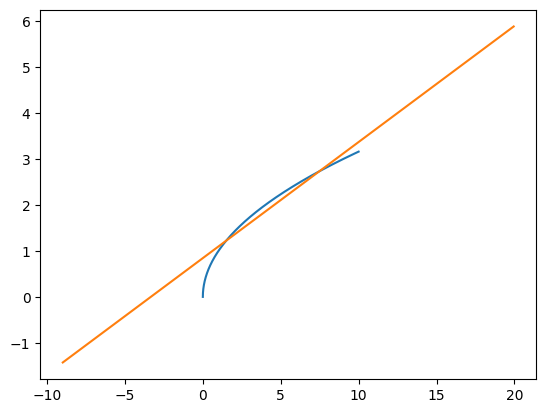

In [28]:
xs = xs.reshape(-1, 1)
t = t.reshape(-1,1)
reg = LinearRegression().fit(xs, ys)
print(reg.predict(t))
plt.plot(xs, ys)
plt.plot(t, reg.predict(t))

In [29]:
model = keras.Sequential([
      tf.keras.layers.Dense(2, input_shape = [1]),
      tf.keras.layers.Dense(64, activation = 'relu'),
      tf.keras.layers.Dense(64, activation = 'relu'),
      tf.keras.layers.Dense(1)
  ])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(xs, ys, epochs=50)

Epoch 1/50
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0147
Epoch 2/50
3125/3125 [==============================] - 4s 1ms/step - loss: 9.6181e-04
Epoch 3/50
3125/3125 [==============================] - 4s 1ms/step - loss: 3.7634e-04
Epoch 4/50
3125/3125 [==============================] - 4s 1ms/step - loss: 2.3227e-04
Epoch 5/50
3125/3125 [==============================] - 4s 1ms/step - loss: 1.7060e-04
Epoch 6/50
3125/3125 [==============================] - 4s 1ms/step - loss: 1.5108e-04
Epoch 7/50
3125/3125 [==============================] - 4s 1ms/step - loss: 1.6084e-04
Epoch 8/50
3125/3125 [==============================] - 4s 1ms/step - loss: 2.8447e-04
Epoch 9/50
3125/3125 [==============================] - 4s 1ms/step - loss: 1.2366e-04
Epoch 10/50
3125/3125 [==============================] - 4s 1ms/step - loss: 1.0303e-04
Epoch 11/50
3125/3125 [==============================] - 4s 1ms/step - loss: 1.5917e-04
Epoch 12/50
3125/3125 [======================

32/32 [==============================] - 0s 697us/step


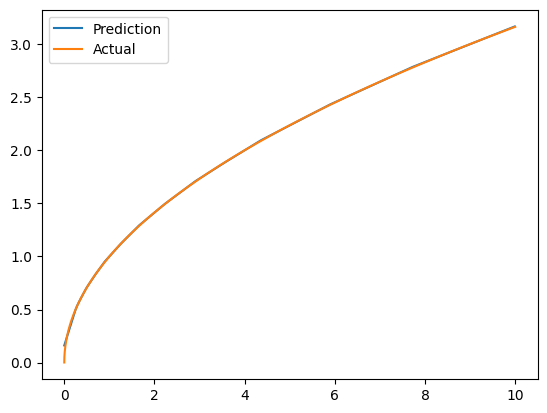

In [30]:
t = np.arange(0, 10, 0.01)
plt.plot(t, model.predict(t), label = "Prediction")
plt.plot(xs, ys, label = "Actual")
plt.legend()

## Round 5: Try an arbitrary relationship then

<AxesSubplot: >

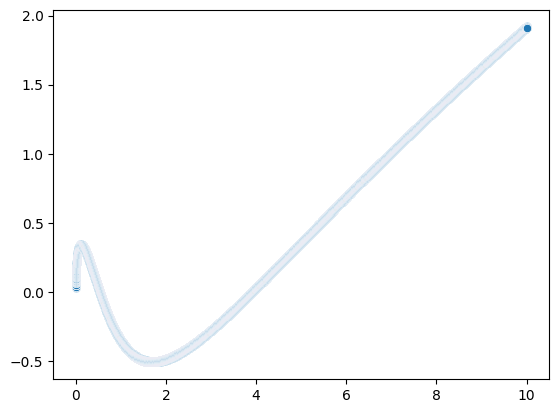

In [31]:
size = 100000
xs = np.random.uniform(0, 10, (size))
xs.sort()
ys = [0] * size
for i in range(size):
  ys[i] = math.sqrt(xs[i])*2 - math.atan(xs[i])*3 + np.random.random()*0.01
ys = np.array(ys)
sns.scatterplot(x = xs, y = ys)

In [32]:
model = keras.Sequential([
      tf.keras.layers.Dense(64, input_shape = [1]),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(xs, ys, epochs=5)

Epoch 1/5
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0125
Epoch 2/5
3125/3125 [==============================] - 4s 1ms/step - loss: 8.0274e-04
Epoch 3/5
3125/3125 [==============================] - 4s 1ms/step - loss: 1.8838e-04
Epoch 4/5
3125/3125 [==============================] - 4s 1ms/step - loss: 1.8755e-04
Epoch 5/5
3125/3125 [==============================] - 4s 1ms/step - loss: 1.5765e-04


313/313 [==============================] - 0s 764us/step


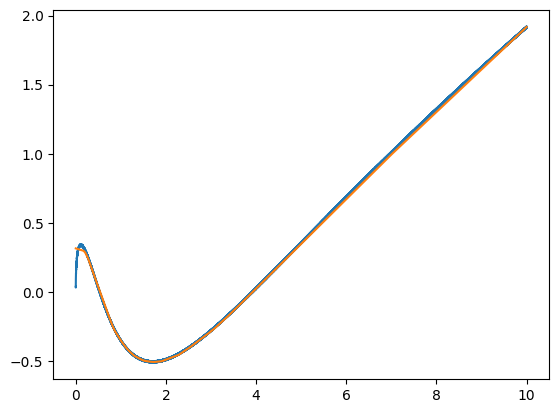

In [33]:
t = np.arange(0, 10, 0.001)
plt.plot(xs, ys)
plt.plot(t, model.predict(t))

## Round 6: Try another arbitrary relationship

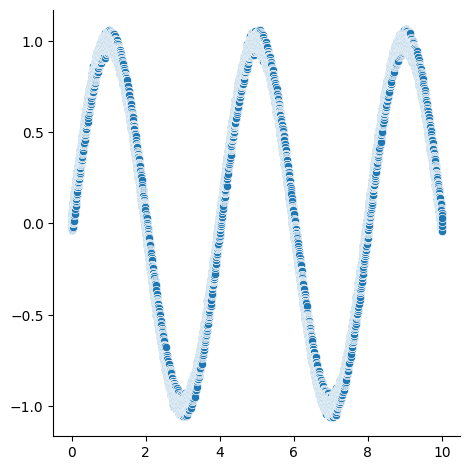

In [34]:
#create dataset

size = 100000
np.random.seed(seed=2)
xs = np.random.uniform(low=0.0, high=10.0, size=(size))
xs.sort()
slope = 0.25
noise = 0.02
ys = np.sin(xs/(2)*np.pi) + np.random.normal(loc=0.0, scale=noise, size=(size,))

sns.relplot(x = xs, y = ys)

In [35]:
model = keras.Sequential([
      tf.keras.layers.Dense(256, input_shape = [1]),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(256, activation='relu'),
      tf.keras.layers.Dense(256, activation='elu'),
      tf.keras.layers.Dense(1)
  ])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(xs, ys, epochs=10)

Epoch 1/10
3125/3125 [==============================] - 8s 3ms/step - loss: 0.3777
Epoch 2/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.2052
Epoch 3/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0779
Epoch 4/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.0482
Epoch 5/10
3125/3125 [==============================] - 8s 3ms/step - loss: 0.0322
Epoch 6/10
3125/3125 [==============================] - 8s 3ms/step - loss: 0.0244
Epoch 7/10
3125/3125 [==============================] - 8s 3ms/step - loss: 0.0173
Epoch 8/10
3125/3125 [==============================] - 8s 3ms/step - loss: 0.0123
Epoch 9/10
3125/3125 [==============================] - 8s 3ms/step - loss: 0.0101
Epoch 10/10
3125/3125 [==============================] - 8s 3ms/step - loss: 0.0069


3125/3125 [==============================] - 3s 1ms/step


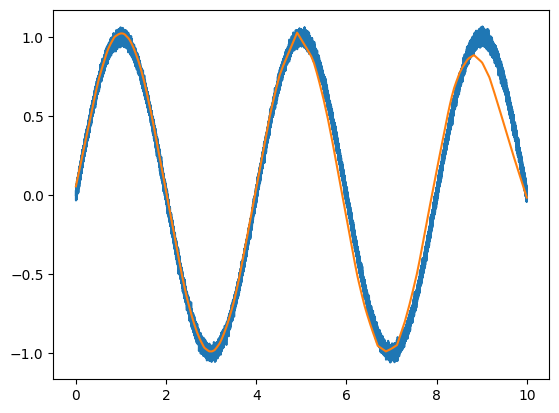

In [36]:
t = np.random.uniform(0, 10, (100000))
t.sort()
t.reshape(-1, 1)
plt.plot(xs, ys)
plt.plot(t, model.predict(t))

## Conclusion: Finally, NN is better (for non linear relationships and with many data points).